In [ ]:
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
import snowflake.connector  # Snowflake Connector
from sqlalchemy import create_engine

# Snowflake connection parameters
snowflake_config = {
    'user': '--',
    'password': '--',
    'account': '--',
    'warehouse': 'C--',
    'database': 'MI--',
    'schema': 'M--',
}

# Establish Snowflake connection
conn = snowflake.connector.connect(**snowflake_config)


# # SQLAlchemy connection URI for Snowflake
# engine = create_engine(f'snowflake://{snowflake_config["user"]}:{snowflake_config["password"]}@{snowflake_config["account"]}/{snowflake_config["database"]}/{snowflake_config["schema"]}?warehouse={snowflake_config["warehouse"]}')


# Assuming your aggregated sales data is stored in Snowflake with a table named 'sales'
SQLquery = '''
    with OrdersFK AS (
    SELECT *, CONCAT("Postal_Code", '-', "City") AS LocationFK, CONCAT("Product_ID", '-', "Product_Name") AS ProductFK
from MILLIAN_STORES.MILLIANBUSINESS_DATA.ORDERS_FROM_MILLIAN
-- limit 5
),

Product AS
(SELECT *, CONCAT("Product_ID", '-', "Product_Name") AS ProductKey
from MILLIAN_STORES.MILLIANBUSINESS_DATA.MILLIAN_PRODUCTS
),

Location AS (
SELECT *, CONCAT("Postal_Code", '-', "City") AS LocationKey
from MILLIAN_STORES.MILLIANBUSINESS_DATA.MILLIAN_LOCATIONS
),

Customers AS
(
    select *
    from MILLIAN_STORES.MILLIANBUSINESS_DATA.MILLIAN_CUSTOMERS
),

OrdersFK AS (
    SELECT *, CONCAT("Postal_Code", '-', "City") AS LocationFK, CONCAT("Product_ID", '-', "Product_Name") AS ProductFK
from MILLIAN_STORES.MILLIANBUSINESS_DATA.ORDERS_FROM_MILLIAN
-- limit 5
)

SELECT 
ofk."Order_ID", ofk."Order_Date", ofk."Ship_Date", ofk."Ship_Mode", 
ofk."Product_Name", ofk."Sales", cs."Customer_Name", cs."Segment",
lc."Country", lc."City", lc."State", lc."Region", ofk."Postal_Code",
pd."Product_Name", pd."Sub_Category", pd."Product_ID", pd."Category"
FROM OrdersFK ofk
INNER JOIN CUSTOMERS cs ON ofk."Customer_ID" = cs."Customer_ID"
INNER JOIN PRODUCT pd ON ofk.ProductFK = pd.ProductKey
INNER JOIN location lc ON ofk.LocationFK = lc.LocationKey
'''

# Execute query and read into DataFrame
millianbiz_df = pd.read_sql_query(SQLquery, conn)

# # Execute query and read into DataFrame
# sales_df = pd.read_sql_query(sales_query, engine)

# Close Snowflake connection
conn.close()
millianbiz_df

In [17]:
millianbiz_df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Product_Name,Sales,Customer_Name,Segment,Country,City,State,Region,Postal_Code,Product_Name,Sub_Category,Product_ID,Category
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Bush Somerset Collection Bookcase,261.9600,Claire Gute,Consumer,United States,Henderson,Kentucky,South,42420.0,Bush Somerset Collection Bookcase,Bookcases,FUR-BO-10001798,Furniture
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Claire Gute,Consumer,United States,Henderson,Kentucky,South,42420.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,FUR-CH-10000454,Furniture
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Self-Adhesive Address Labels for Typewriters b...,14.6200,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,90036.0,Self-Adhesive Address Labels for Typewriters b...,Labels,OFF-LA-10000240,Office Supplies
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Bretford CR4500 Series Slim Rectangular Table,957.5775,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,33311.0,Bretford CR4500 Series Slim Rectangular Table,Tables,FUR-TA-10000577,Furniture
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Eldon Fold N Roll Cart System,22.3680,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,33311.0,Eldon Fold N Roll Cart System,Storage,OFF-ST-10000760,Office Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,60610.0,"Cardinal HOLDit! Binder Insert Strips,Extra St...",Binders,OFF-BI-10003429,Office Supplies
9785,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,43615.0,"BIC Brite Liner Highlighters, Chisel Tip",Art,OFF-AR-10001374,Office Supplies
9786,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,GE 30524EE4,235.1880,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,43615.0,GE 30524EE4,Phones,TEC-PH-10004977,Technology
9787,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,Anker 24W Portable Micro USB Car Charger,26.3760,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,43615.0,Anker 24W Portable Micro USB Car Charger,Phones,TEC-PH-10000912,Technology


In [13]:
millianbiz_df.describe()

,Sales,Postal_Code
count,9789.000000,9789.000000
mean,230.116193,55273.322403
std,625.302079,32041.223413
min,0.444000,1040.000000
25%,17.248000,23223.000000
50%,54.384000,58103.000000
75%,210.392000,90008.000000
max,22638.480000,99301.000000


In [14]:
millianbiz_df['Postal_Code'] = millianbiz_df['Postal_Code'].astype('str')
millianbiz_df.describe()

,Sales
count,9789.000000
mean,230.116193
std,625.302079
min,0.444000
25%,17.248000
50%,54.384000
75%,210.392000
max,22638.480000


In [16]:
millianbiz_df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Product_Name,Sales,Customer_Name,Segment,Country,City,State,Region,Postal_Code,Product_Name,Sub_Category,Product_ID,Category
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Bush Somerset Collection Bookcase,261.9600,Claire Gute,Consumer,United States,Henderson,Kentucky,South,42420.0,Bush Somerset Collection Bookcase,Bookcases,FUR-BO-10001798,Furniture
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Claire Gute,Consumer,United States,Henderson,Kentucky,South,42420.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,FUR-CH-10000454,Furniture
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Self-Adhesive Address Labels for Typewriters b...,14.6200,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,90036.0,Self-Adhesive Address Labels for Typewriters b...,Labels,OFF-LA-10000240,Office Supplies
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Bretford CR4500 Series Slim Rectangular Table,957.5775,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,33311.0,Bretford CR4500 Series Slim Rectangular Table,Tables,FUR-TA-10000577,Furniture
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Eldon Fold N Roll Cart System,22.3680,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,33311.0,Eldon Fold N Roll Cart System,Storage,OFF-ST-10000760,Office Supplies


In [18]:
millianbiz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9789 non-null   object 
 1   Order_Date     9789 non-null   object 
 2   Ship_Date      9789 non-null   object 
 3   Ship_Mode      9789 non-null   object 
 4   Product_Name   9789 non-null   object 
 5   Sales          9789 non-null   float64
 6   Customer_Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Region         9789 non-null   object 
 12  Postal_Code    9789 non-null   object 
 13  Product_Name   9789 non-null   object 
 14  Sub_Category   9789 non-null   object 
 15  Product_ID     9789 non-null   object 
 16  Category       9789 non-null   object 
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


In [21]:
missing_values_count = millianbiz_df.isnull().sum()
print("Missing Values Count:\n", missing_values_count)

Missing Values Count:
 Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Product_Name     0
Sales            0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Postal_Code      0
Product_Name     0
Sub_Category     0
Product_ID       0
Category         0
dtype: int64


In [26]:
millianbiz_df_cleaned = millianbiz_df.dropna()
print("Shape of Cleaned DataFrame:", millianbiz_df_cleaned.shape)

millianbiz_df_cleaned.dtypes

Shape of Cleaned DataFrame: (9789, 17)


Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Product_Name      object
Sales            float64
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Postal_Code       object
Product_Name      object
Sub_Category      object
Product_ID        object
Category          object
dtype: object

In [28]:
millianbiz_df_cleaned.loc[:, 'Sales'] = millianbiz_df_cleaned['Sales'].astype(int)
millianbiz_df_cleaned['Order_Date'] = pd.to_datetime(millianbiz_df_cleaned['Order_Date'])
millianbiz_df_cleaned['Ship_Date'] = pd.to_datetime(millianbiz_df_cleaned['Ship_Date'])
millianbiz_df_cleaned.dtypes

/var/folders/5b/sgxl23p16bb9fjtjq5f_k8zh0000gn/T/ipykernel_17752/2690569154.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  millianbiz_df_cleaned['Order_Date'] = pd.to_datetime(millianbiz_df_cleaned['Order_Date'])
/var/folders/5b/sgxl23p16bb9fjtjq5f_k8zh0000gn/T/ipykernel_17752/2690569154.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  millianbiz_df_cleaned['Ship_Date'] = pd.to_datetime(millianbiz_df_cleaned['Ship_Date'])


Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Product_Name             object
Sales                     int64
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Postal_Code              object
Product_Name             object
Sub_Category             object
Product_ID               object
Category                 object
dtype: object

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

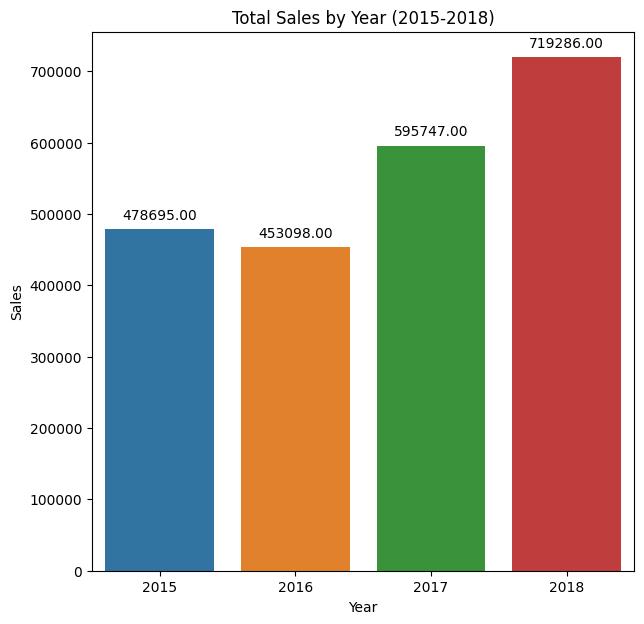

In [31]:
# Define year for date-time
millianbiz_df_cleaned['Year'] = millianbiz_df_cleaned['Order_Date'].dt.year

# Filter the data for the years 2015 to 2018
sales_by_year = millianbiz_df_cleaned[millianbiz_df_cleaned['Year'].between(2015, 2018)]

# Bar plot
plt.figure(figsize=(7, 7))
ax = sns.barplot(data=sales_by_year, x='Year', y='Sales', estimator=sum, errorbar=None)
plt.title('Total Sales by Year (2015-2018)')
plt.xlabel('Year')
plt.ylabel('Sales')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [35]:
import seaborn as sns

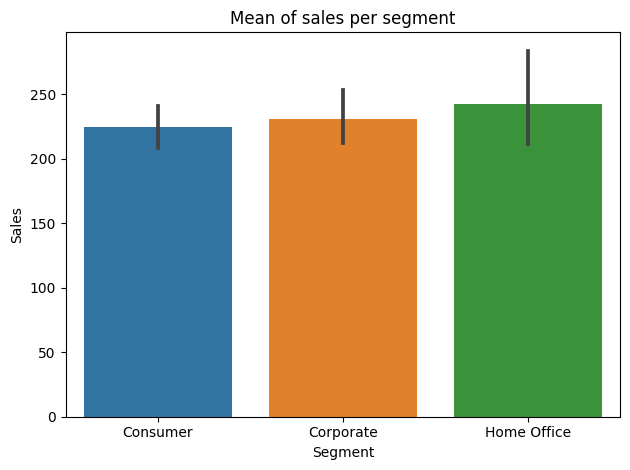

In [38]:
cat_col="Segment" 
num_Col="Sales"
sns.barplot(x=cat_col, y=num_Col, data=millianbiz_df_cleaned)
plt.title("Mean of sales per segment",fontsize=12)
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

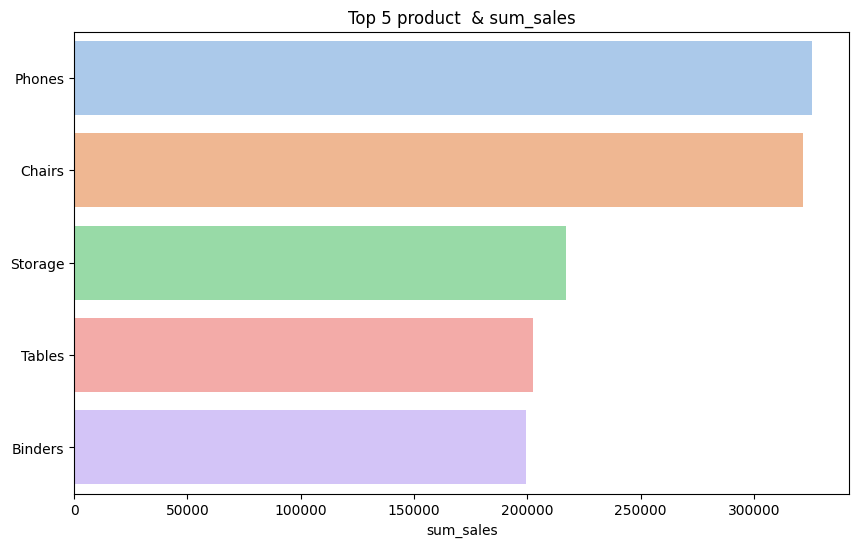

In [48]:
group_df = millianbiz_df_cleaned.groupby("Sub_Category").agg(
    sum_sales=("Sales", "sum"),
).sort_values(by="sum_sales", ascending=False).reset_index()
group_df = group_df.head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=group_df, y="Sub_Category", x="sum_sales", palette="pastel")
plt.title("Top 5 product  & sum_sales", fontsize=12)
plt.ylabel("")

In [53]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [54]:
import squarify


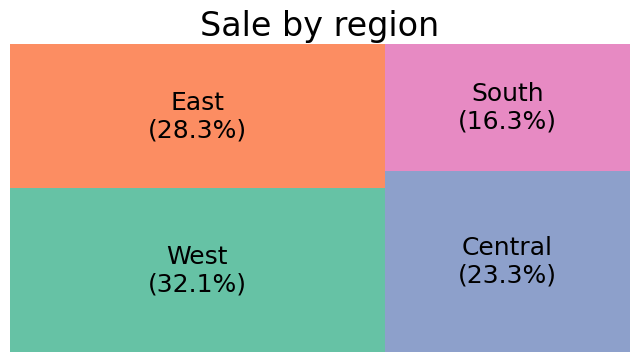

In [57]:
# count regions
valCount=millianbiz_df_cleaned["Region"].value_counts()

# prepare labels
label=[]
summ=sum(valCount.tolist())
for idx, name in enumerate(valCount.index.tolist()):
    label.append(name
                #  + " ( "+ str(valCount[idx]) +" )"
                    + "\n(" +f"{100*valCount[idx]/summ:.1f}"+"%)" )

# create treemap
plt.figure(figsize=(8, 4))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(sizes=valCount.values,
                label=label,
                color=sns.color_palette("Set2", len(valCount)),
                pad=0,#distance between squares
                text_kwargs={'fontsize': 18})
axis.set_title("Sale by region", fontsize=24)
plt.show()